In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection


file_path = "output/electrode_npp_results.npz"

data = np.load(file_path)
nodes = data['nodes']
elements = data['elements']
c1_history = data['c1_history']
c2_history = data['c2_history']
phi_history = data['phi_history']
dt = data['dt'].item()  # Use .item() to get scalar value
num_steps = c1_history.shape[0]
phi_c = data['phi_c'].item()
tau_c = data['tau_c'].item()

In [118]:
c1_history.shape

(401, 441)

In [119]:
phi = pd.DataFrame(phi_history)

In [120]:
phi.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.007300,0.007153,0.006726,0.006074,0.005213,0.004357,0.003542,0.002830,0.002131,0.001232,...,0.007685,0.005694,0.003773,0.002118,0.000678,-0.000476,-0.001352,-0.002047,-0.002493,-0.002651
2,0.007302,0.007157,0.006730,0.006075,0.005215,0.004357,0.003543,0.002829,0.002127,0.001229,...,0.007683,0.005691,0.003770,0.002112,0.000671,-0.000483,-0.001363,-0.002057,-0.002503,-0.002663
3,0.007296,0.007154,0.006727,0.006069,0.005212,0.004354,0.003540,0.002825,0.002121,0.001225,...,0.007674,0.005683,0.003764,0.002104,0.000663,-0.000490,-0.001372,-0.002066,-0.002510,-0.002671
4,0.007291,0.007151,0.006723,0.006064,0.005210,0.004350,0.003537,0.002821,0.002115,0.001222,...,0.007665,0.005674,0.003758,0.002096,0.000655,-0.000497,-0.001382,-0.002074,-0.002517,-0.002680


In [121]:
np.sum(c1_history[0])- np.sum(c1_history[-1])

np.float64(-4.214315690754432)

In [122]:
# k=0.5 -> -0.49
# k=5 -> -4.05

# k = 1; T = 400 -> -4.65
# k = -1; T = 400 

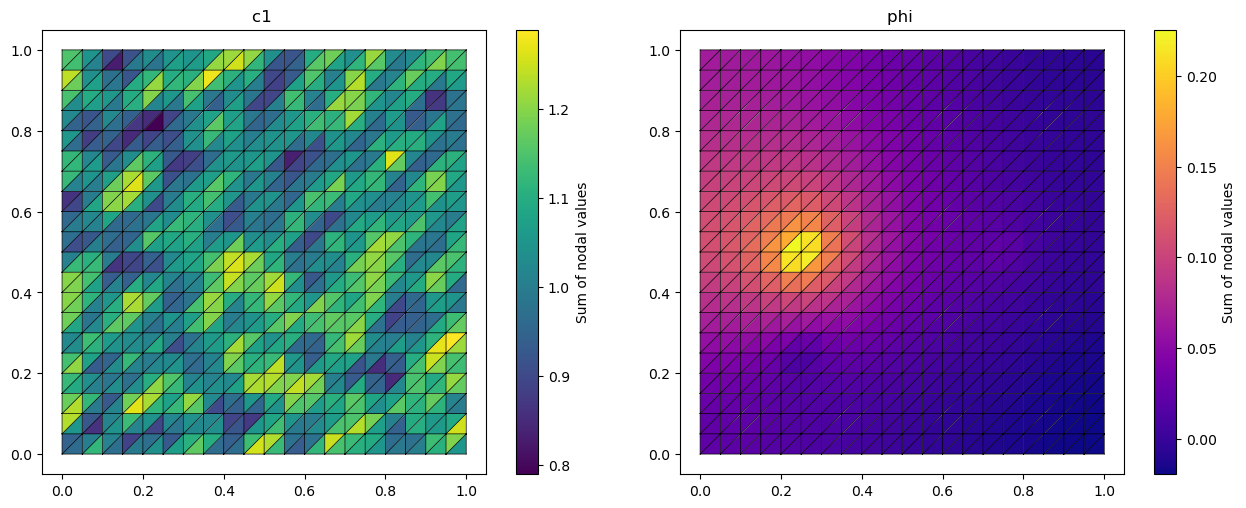

In [123]:
i = 1

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

                # --- Plot c1 on the first axis (ax1) ---
c1_triangle_values = c1_history[i][elements].sum(axis=1)
collection1 = PolyCollection(nodes[elements], cmap='viridis')
collection1.set_array(c1_triangle_values)
ax1.add_collection(collection1)
ax1.triplot(nodes[:, 0], nodes[:, 1], elements, 'k-', lw=0.5)
ax1.set_title(f"c1 ")
fig.colorbar(collection1, ax=ax1, label="Sum of nodal values")
ax1.autoscale_view()
ax1.set_aspect('equal')

                # --- Plot phi on the second axis (ax2) ---
phi_triangle_values = phi_history[i][elements].sum(axis=1)
collection2 = PolyCollection(nodes[elements], cmap='plasma')
collection2.set_array(phi_triangle_values)
ax2.add_collection(collection2)
ax2.triplot(nodes[:, 0], nodes[:, 1], elements, 'k-', lw=0.5)
ax2.set_title(f"phi ")
fig.colorbar(collection2, ax=ax2, label="Sum of nodal values")
ax2.autoscale_view()
ax2.set_aspect('equal')

                # --- Finalize and show the plot ---
plt.tight_layout()
plt.show()

In [124]:
from utils.fem_mesh import create_structured_mesh, TriangularMesh



nx, ny = 30, 30
Lx, Ly = 1.0e-7, 1.0e-7
nodes, elements = create_structured_mesh(Lx=Lx, Ly=Ly, nx=nx, ny=ny)
mesh = TriangularMesh(nodes, elements)

ValueError: too many values to unpack (expected 2)

In [ ]:
nodes.shape

(961, 2)